In [18]:
from __future__ import print_function
import torch
import numpy as np
import os
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
np.set_printoptions(threshold=np.inf)
import tensorflow as tf



conv1_weight = np.load("H:\\tensorflow\\flow\weights\conv1.npy")
# print(conv1_weight)
conv2_weight = np.load("H:\\tensorflow\\flow\weights\conv2.npy")
fc_weight = np.load("H:\\tensorflow\\flow\weights\\fc.npy")
# print(conv1_weight.shape)
conv1_weight=torch.tensor(conv1_weight).permute(0, 3, 2, 1).to(torch.float32)
conv2_weight=torch.tensor(conv2_weight).permute(0, 3, 2, 1).to(torch.float32)
fc_weight=torch.tensor(fc_weight).to(torch.float32)

np.save("H:\\tensorflow\\torch\weights\conv1.npy", np.asarray(conv1_weight))
np.save("H:\\tensorflow\\torch\weights\conv2.npy", np.asarray(conv2_weight))
np.save("H:\\tensorflow\\torch\weights\\fc.npy", np.asarray(fc_weight))

class ToTensor(object):
    def __call__(self, image):
        image = np.asarray(image)
        return torch.tensor(image).to(torch.float32)
transforms = torchvision.transforms.Compose([torchvision.transforms.Grayscale(), ToTensor()])

cal_dataset = torchvision.datasets.ImageFolder("H:\\tensorflow\\torch\cal_dataset", transforms)
cal_loader = DataLoader(cal_dataset, 1, False, num_workers=0)

fc_weight.shape, conv1_weight.shape, conv2_weight.shape


(torch.Size([27, 384]), torch.Size([4, 1, 3, 3]), torch.Size([8, 4, 3, 3]))

In [19]:
conv2d = torch.nn.Conv2d(1, 4, 3, 1, 1)
print(conv2d.weight.shape)

torch.Size([4, 1, 3, 3])


In [20]:
fconv1_weight = np.load("H:\\tensorflow\\torch\weights\\conv1_tensor.npy")
# print(conv1_weight)
fconv2_weight = np.load("H:\\tensorflow\\torch\weights\\conv2_tensor.npy")
ffc_weight = np.load("H:\\tensorflow\\torch\weights\\fc_tensor.npy")
fconv1_weight=torch.tensor(fconv1_weight).to(torch.float32).permute(0, 3, 1, 2)
fconv2_weight=torch.tensor(fconv2_weight).to(torch.float32).permute(0, 3, 1, 2)
ffc_weight=torch.tensor(ffc_weight).to(torch.float32)


np.save("H:\\tensorflow\\torch\weights\\tensor_fconv1.npy", np.asarray(fconv1_weight))
np.save("H:\\tensorflow\\torch\weights\\tensor_fconv2.npy", np.asarray(fconv2_weight))
np.save("H:\\tensorflow\\torch\weights\\tensor_ffc.npy", np.asarray(ffc_weight))
# print(fconv1_weight)
# fconv1_weight
# print(ffc_weight)
fconv1_weight.shape, fconv2_weight.shape, ffc_weight.shape

(torch.Size([4, 1, 3, 3]), torch.Size([8, 4, 3, 3]), torch.Size([27, 384]))

In [21]:
tfconv1_weight = np.load("H:\\tensorflow\\flow\weights\\tfconv1.npy")
# print(conv1_weight)
tfconv2_weight = np.load("H:\\tensorflow\\flow\weights\\tfconv2.npy")
tffc_weight = np.load("H:\\tensorflow\\flow\weights\\tffc.npy")
tfconv1_weight=torch.tensor(tfconv1_weight).to(torch.float32)
tfconv2_weight=torch.tensor(tfconv2_weight).to(torch.float32)
tffc_weight=torch.tensor(tffc_weight).permute(1, 0).to(torch.float32)

np.save("H:\\tensorflow\\torch\weights\\tfconv1.npy", np.asarray(tfconv1_weight))
np.save("H:\\tensorflow\\torch\weights\\tfconv2.npy", np.asarray(tfconv2_weight))
np.save("H:\\tensorflow\\torch\weights\\tffc.npy", np.asarray(tffc_weight))
# print(fconv1_weight)
tfconv1_weight.shape


torch.Size([3, 3, 1, 4])

In [22]:
# class ToTensor(object):
#     def __call__(self, image):
#         image = np.asarray(image)
#         return torch.tensor(image).to(torch.float32)
# transforms = torchvision.transforms.Compose([ToTensor()])

In [23]:
def conv1(x, w, idx):
    y = F.conv2d(x, w, None, 1, 1)
    npy = np.array(y)
    np.save(f"H:\\tensorflow\\torch\conv1\conv1_cal_{idx}.npy", npy)
    # if idx==0:
    #     print(f"conv1\n\n{npy}\n\n")    
    return y
def maxpool1(x, idx):
    y = torch.nn.MaxPool2d((2, 2), 2)(x)
    npy = np.array(y)
    np.save(f"H:\\tensorflow\\torch\pool1\pool1_cal_{idx}.npy", npy)
    # if idx==0:
    #     print(f"pool1\n\n{npy}\n\n")     
    return y
def relu1(x, idx):
    y = F.relu(x)
    npy = np.array(y)
    np.save(f"H:\\tensorflow\\torch\\relu1\\relu1_cal_{idx}.npy", npy)
    # if idx==0:
    #     print(f"relu1\n\n{npy}\n\n")     
    return y
def conv2(x, w, idx):
    y = F.conv2d(x, w, None, 1, 1)
    npy = np.array(y)
    np.save(f"H:\\tensorflow\\torch\conv2\conv2_cal_{idx}.npy", npy)  
    # if idx==0:
    #     print(f"conv2\n\n{npy}\n\n")     
    return y
def maxpool2(x, idx):
    y = torch.nn.MaxPool2d((2, 2), 2)(x)
    npy = np.array(y)
    np.save(f"H:\\tensorflow\\torch\pool2\pool2_cal_{idx}.npy", npy)
    # if idx==0:
    #     print(f"pool2\n\n{npy}\n\n")     
    return y
def relu2(x, idx):
    y = F.relu(x)
    npy = np.array(y)
    np.save(f"H:\\tensorflow\\torch\\relu2\\relu2_cal_{idx}.npy", npy)
    # if idx==0:
    #     print(f"relu2\n\n{npy}\n\n")    
    return y
def fc(x, w, idx):
    y = F.linear(x, w, None)
    npy = np.array(y)
    np.save(f"H:\\tensorflow\\torch\\fc\\fc_cal_{idx}.npy", npy)  
    # if idx==0:
    #     print(f"fc\n\n{npy}\n\n")    
    return y
acc = 0
sam = 0


In [24]:
# print(fconv1_weight)
# print(fconv2_weight)
# print(ffc_weight)

In [25]:
class ASL(torch.nn.Module):
    def __init__(self):
        super(ASL, self).__init__()
        self.Lconv1 =    torch.nn.Conv2d(1, 4, 3, 1, 1, bias=False)
        self.Lrelu1 =     torch.nn.ReLU()
        self.Lpool1 =     torch.nn.MaxPool2d(2, 2)
        self.Lconv2 =     torch.nn.Conv2d(4, 8, 3, 1, 1, bias=False)
        self.Lrelu2 =     torch.nn.ReLU()
        self.Lpool2 =     torch.nn.MaxPool2d(2, 2)
        self.Lflat =     torch.nn.Flatten()
        self.Llinear =     torch.nn.Linear(384, 27, bias=False)
        
    def forward(self, x):
        x = self.Lpool2(self.Lrelu2(self.Lconv2(self.Lpool1(self.Lrelu1(self.Lconv1(x))))))
        x = x.permute(0, 2, 3, 1)
        return self.Llinear(self.Lflat(x))

model = ASL()

In [26]:
print(model.state_dict().keys())
model.Lconv1.weight.data = fconv1_weight
model.Lconv2.weight.data = fconv2_weight
model.Llinear.weight.data = ffc_weight

odict_keys(['Lconv1.weight', 'Lconv2.weight', 'Llinear.weight'])


In [27]:
acc = 0
sam = 0
for i, (feature, label) in enumerate(cal_dataset):
    # print(i)
    sam += 1
    # print(feature)
    with torch.no_grad():
        feature = torch.unsqueeze(feature, dim=0)
        feature = torch.unsqueeze(feature, dim=0)
        feature.requires_grad = False
        output = model(feature)
        _, prediction = torch.max(output, 1)
        if prediction.item() == label:
            acc += 1
        # print(prediction)
print(acc/sam)

0.8888888888888888


In [28]:
from PIL import Image
data = np.asarray(Image.open("H:\\tensorflow\\torch\cal_dataset\Z\\temperature_image_0.png"))
print(data.shape)
data = torch.unsqueeze(torch.tensor(data), dim=0).to(torch.float32)
data = torch.unsqueeze(data, dim=0)
out = model(data)
_, prediction = torch.max(out, 1)
out, prediction, data.shape


(24, 32)


(tensor([[ -62.5787, -102.8038,  -90.6651,  -20.1619,  -99.4374,  -67.5091,
           -56.5997, -117.1688,  -44.5894,  -82.2286,  -18.5809,  -24.0874,
           -71.4404,  -88.8474,  -66.3295,  -29.6895,  -30.0203,  -14.9207,
          -117.6942,  -57.3426,  -21.0905,   -9.5403,  -58.5770,  -20.1815,
           -57.2318,    8.2209,  -40.9147]], grad_fn=<MmBackward0>),
 tensor([25]),
 torch.Size([1, 1, 24, 32]))

In [29]:
# torch.set_printoptions(threshold=torch.inf)
# # 
# out = model.Lconv1(data)
# out_tf = tf.nn.conv2d(data.permute(0, 2, 3, 1), tfconv1_weight, 1, "SAME")
# _out = torch.tensor(np.asarray(out_tf)).permute(0, 3, 1, 2)
# out = torch.nn.ReLU()(out)
# out_tf = tf.nn.relu(out_tf)
# _out = torch.tensor(np.asarray(out_tf)).permute(0, 3, 1, 2)
# out = torch.nn.MaxPool2d(2, 2)(out)
# out_tf = tf.nn.max_pool2d(out_tf, 2, 2, "VALID")
# _out = torch.tensor(np.asarray(out_tf)).permute(0, 3, 1, 2)
# out = model.Lconv2(out)
# out_tf = tf.nn.conv2d(out_tf, tfconv2_weight, 1, "SAME")
# _out = torch.tensor(np.asarray(out_tf)).permute(0, 3, 1, 2)
# out = torch.nn.ReLU()(out)
# out_tf = tf.nn.relu(out_tf)
# _out = torch.tensor(np.asarray(out_tf)).permute(0, 3, 1, 2)
# out = torch.nn.MaxPool2d(2, 2)(out)
# out_tf = tf.nn.max_pool2d(out_tf, 2, 2, "VALID")
# _out = torch.tensor(np.asarray(out_tf)).permute(0, 3, 1, 2)
# print(out.shape)
# out = out.permute(0, 2, 3, 1)
# out = torch.nn.Flatten(start_dim=1, end_dim=-1)(out)
# print(out_tf.shape)
# out_tf = tf.keras.layers.Flatten()(out_tf)
# _out = torch.tensor(np.asarray(out_tf))
# out = model.Llinear(out)
# out_tf = tf.compat.v1.nn.xw_plus_b(out_tf, np.transpose(tffc_weight), np.zeros(27, dtype=np.float32).flatten())
# _out = torch.tensor(np.asarray(out_tf))

0.8888888888888888


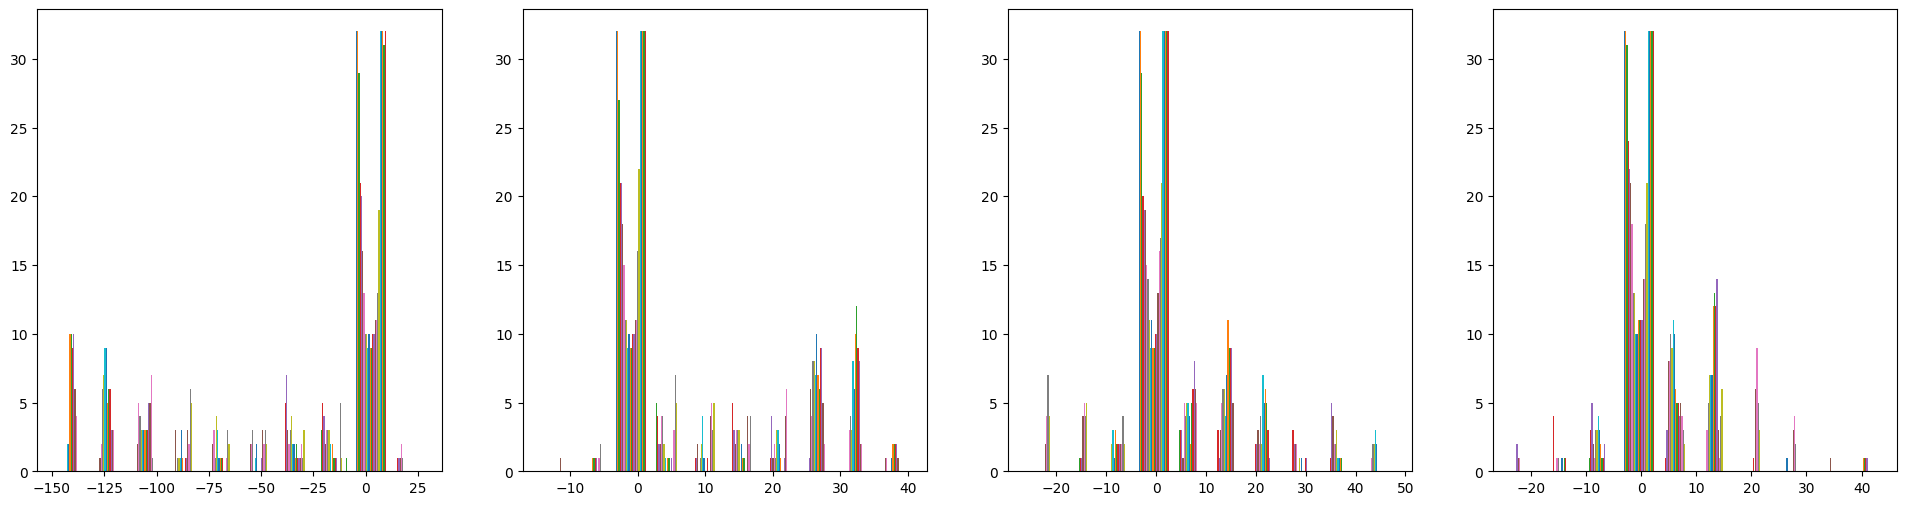

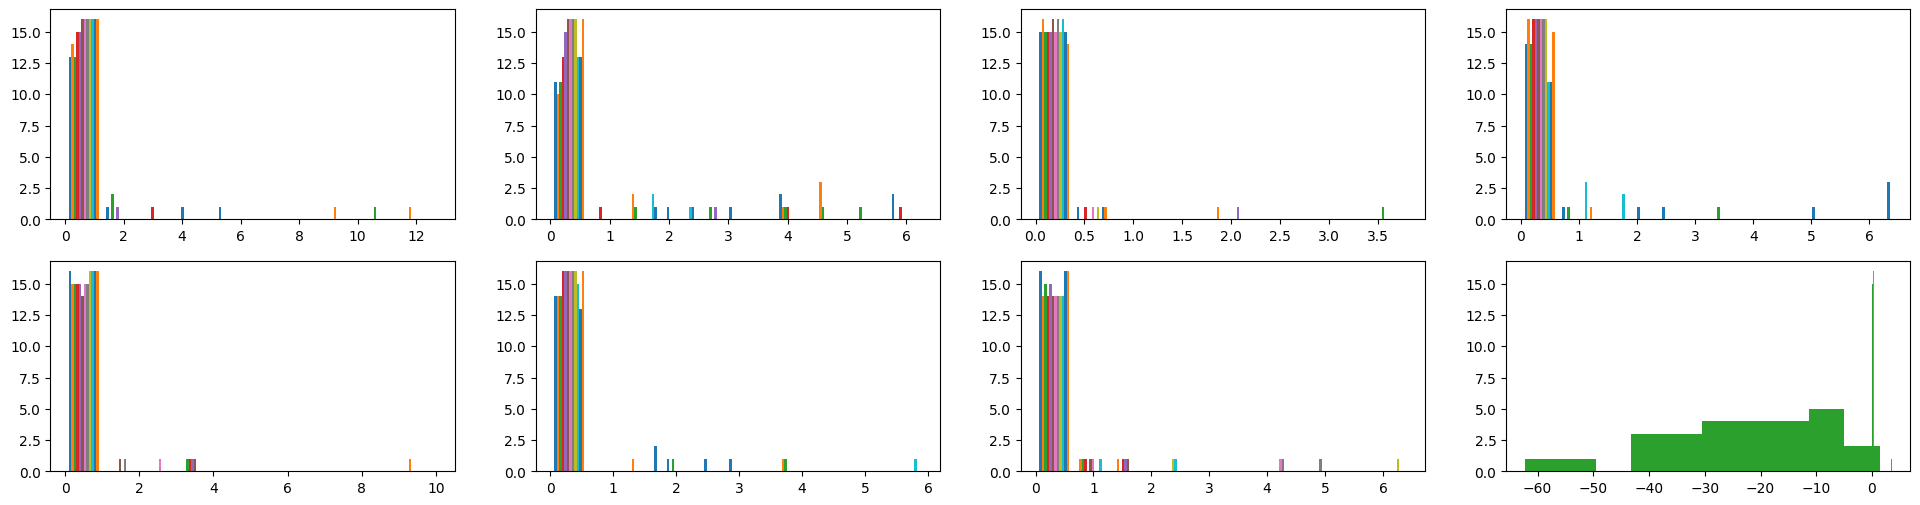

In [30]:


model.Lconv1.weight.data = fconv1_weight
model.Lconv2.weight.data = fconv2_weight
model.Llinear.weight.data = ffc_weight
acc = 0
sam = 0
import matplotlib.pyplot as plt 
for i, (feature, label) in enumerate(cal_dataset):
    # print(i)
    sam += 1
    # print(feature)
    with torch.no_grad():
        feature = torch.unsqueeze(feature, dim=0)
        feature = torch.unsqueeze(feature, dim=0)
        feature.requires_grad = False
        # output = model(feature)
        x = model.Lconv1(feature)
        if i == 0:
            plt.subplots(1, 4, figsize = (24, 6))
            plt.subplot(1, 4, 1)
            plt.hist(x[0, 0, :, : ])
            plt.subplot(1, 4, 2)
            plt.hist(x[0, 1, :, : ])
            plt.subplot(1, 4, 3)
            plt.hist(x[0, 2, :, : ])
            plt.subplot(1, 4, 4)
            plt.hist(x[0, 3, :, : ])
        x = torch.nn.ReLU()(x)
        
        

        
        x = torch.nn.MaxPool2d(2, 2)(x)
        
        x = model.Lconv2(x)
        
        
        x = torch.nn.ReLU()(x)
        if i == 0:
            plt.subplots(2, 4, figsize = (24, 6))
            plt.subplot(2, 4, 1)
            plt.hist(x[0, 0, :, : ])
            plt.subplot(2, 4, 2)
            plt.hist(x[0, 1, :, : ])
            plt.subplot(2, 4, 3)
            plt.hist(x[0, 2, :, : ])
            plt.subplot(2, 4, 4)
            plt.hist(x[0, 3, :, : ])
            plt.subplot(2, 4, 5)
            plt.hist(x[0, 4, :, : ])
            plt.subplot(2, 4, 6)
            plt.hist(x[0, 5, :, : ])
            plt.subplot(2, 4, 7)
            plt.hist(x[0, 6, :, : ])
            plt.subplot(2, 4, 8)
            plt.hist(x[0, 7, :, : ])
        x = torch.nn.MaxPool2d(2, 2)(x)
        
        
        x = x.permute(0, 2, 3, 1)
        x = torch.nn.Flatten()(x)
        output = model.Llinear(x)
        if i == 0:
            plt.hist(output)
        
        _, prediction = torch.max(output, 1)
        if prediction.item() == label:
            acc += 1
        # print(prediction)
print(acc/sam)



In [31]:
conv1_weight = np.load("H:\\tensorflow\\flow\weights\conv1.npy")
# print(conv1_weight)
conv2_weight = np.load("H:\\tensorflow\\flow\weights\conv2.npy")
fc_weight = np.load("H:\\tensorflow\\flow\weights\\fc.npy")
# print(conv1_weight.shape)
conv1_weight=torch.tensor(conv1_weight).permute(0, 3, 1, 2).to(torch.float32)
conv2_weight=torch.tensor(conv2_weight).permute(0, 3, 1, 2).to(torch.float32)
fc_weight=torch.tensor(fc_weight).to(torch.float32)

np.save("H:\\tensorflow\\torch\weights\conv1.npy", np.asarray(conv1_weight))
np.save("H:\\tensorflow\\torch\weights\conv2.npy", np.asarray(conv2_weight))
np.save("H:\\tensorflow\\torch\weights\\fc.npy", np.asarray(fc_weight))

# scale_conv1 = [0.00283895, 0.00060151, 0.00108942, 0.00074077]
# scale_conv2 = [0.00349254, 0.00229409, 0.00524954, 0.03148467, 0.00378907, 0.01036217, 0.00376472, 0.01108783]
# scale_fc = [0.05203861]
# for j in range(4):  
#     conv1_weight[j, 0, :, :] = conv1_weight[j, 0, :, :]*scale_conv1[j]
# for j in range(8):
#     conv2_weight[j, :, :, :] = conv2_weight[j, :, :, :]*scale_conv2[j]
# fc_weight = fc_weight*scale_fc[0]

model.Lconv1.weight.data = conv1_weight
model.Lconv2.weight.data = conv2_weight
model.Llinear.weight.data = fc_weight


0.7703703703703704


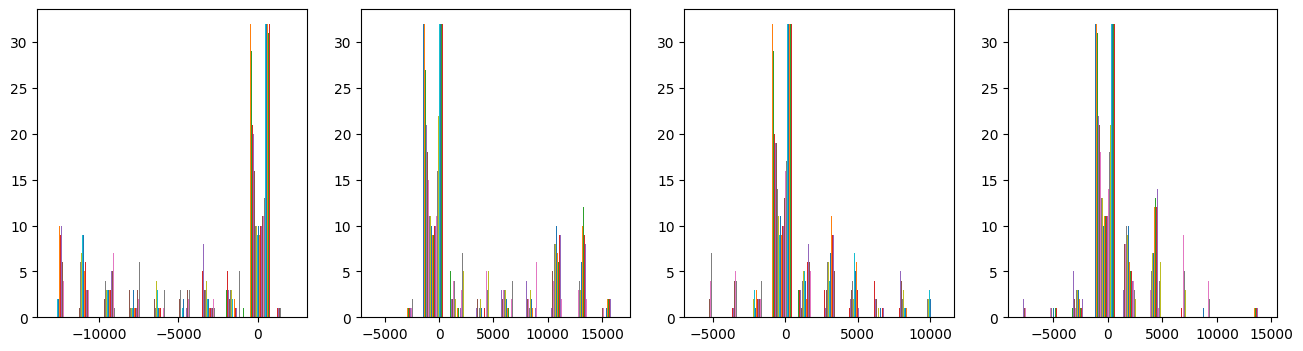

In [32]:
acc = 0
sam = 0


for i, (feature, label) in enumerate(cal_dataset):
    with torch.no_grad():
        sam += 1
        feature = torch.unsqueeze(feature, dim=0)
        feature = torch.unsqueeze(feature, dim=0)
        
        x = model.Lconv1(feature)
        x = x / 2**2  - 128
        x = x.to(torch.int32)
        
    
        # x = (x & 0xFF)
        x = x.to(torch.float32) 
        if i ==0:
            plt.subplots(1, 4, figsize = (16, 4))
            plt.subplot(1, 4, 1)
            plt.hist(x[0, 0, :, :])
            plt.subplot(1, 4, 2)
            plt.hist(x[0, 1, :, :])
            plt.subplot(1, 4, 3)
            plt.hist(x[0, 2, :, :])
            plt.subplot(1, 4, 4)
            plt.hist(x[0, 3, :, :])
        x = torch.nn.ReLU()(x)
        x = torch.nn.MaxPool2d(2, 2)(x) 
        x = model.Lconv2(x)
        x = x / 2**3 - 128
        x = x.to(torch.int32)
        # x = (x & 0xFF)
        x = x.to(torch.float32)
        x = torch.nn.ReLU()(x)
        x = torch.nn.MaxPool2d(2, 2)(x)
        
        
        
        
        x = x.permute(0, 2, 3, 1)
        x = torch.nn.Flatten()(x)
        x = model.Llinear(x)
        # x = x / 1.1237616539001465 + 64
        x = x.to(torch.int32)
        # x = (x & 0xFF)
        x = x.to(torch.float32)
        
        _, prediction = torch.max(x, 1)
        if prediction.item() == label:
            acc += 1
print(acc / sam)

def trunc_conv1(x):
    x = x / 2**6
    return x

In [34]:
acc = 0
sam = 0
g_pth = "H:\\tensorflow\\torch"
l_pth = ["\conv1", "\\relu1", "\pool1", "\conv2", "\\relu2", "\pool2","\permute", "\\flatten", "\dense"]
# plt.subplots(3, 5, figsize = (20, 4))
for i, (feature, label) in enumerate(cal_dataset):
    j = 0
    with torch.no_grad():
        sam += 1
        feature = torch.unsqueeze(feature, dim=0)
        feature = torch.unsqueeze(feature, dim=0)
        
        x = model.Lconv1(feature)
        x = x / 2**2  - 128
        x = x/ 2**5
        x = torch.clamp(x, -128, 127)
        x = x.to(torch.int8)
        npx = np.save(f"{g_pth+l_pth[j]+l_pth[j]}_{i}.npy",np.asarray(x))
        j += 1
        x = x.to(torch.float32) 

        
        x = torch.nn.ReLU()(x)
        npx = np.save(f"{g_pth+l_pth[j]+l_pth[j]}_{i}.npy",np.asarray(x))
        j += 1
        
        x = torch.nn.MaxPool2d(2, 2)(x) 
        npx = np.save(f"{g_pth+l_pth[j]+l_pth[j]}_{i}.npy",np.asarray(x))
        j += 1
        
        x = model.Lconv2(x)
        x = x / 2**3 - 128
        x = x/ 2**5
        x = torch.clamp(x, -128, 127)
        x = x.to(torch.int8)
        npx = np.save(f"{g_pth+l_pth[j]+l_pth[j]}_{i}.npy",np.asarray(x))
        j += 1
        
        
        
    
        x = x.to(torch.float32)
        x = torch.nn.ReLU()(x)
        npx = np.save(f"{g_pth+l_pth[j]+l_pth[j]}_{i}.npy",np.asarray(x))
        j += 1
        
        x = torch.nn.MaxPool2d(2, 2)(x)
        npx = np.save(f"{g_pth+l_pth[j]+l_pth[j]}_{i}.npy",np.asarray(x))
        j += 1
        
        
        
        
        x = x.permute(0, 2, 3, 1)
        npx = np.save(f"{g_pth+l_pth[j]+l_pth[j]}_{i}.npy",np.asarray(x))
        j += 1
        x = torch.nn.Flatten()(x)
        npx = np.save(f"{g_pth+l_pth[j]+l_pth[j]}_{i}.npy",np.asarray(x))
        j += 1
        
        x = model.Llinear(x)
        x = x / 2**4
        x = torch.clamp(x, -128, 127)
        x = x.to(torch.int8)
        npx = np.save(f"{g_pth+l_pth[j]+l_pth[j]}_{i}.npy",np.asarray(x))
        j += 1
        x = x.to(torch.float32)
        
        _, prediction = torch.max(x, 1)
        if prediction.item() == label:
            acc += 1
print(acc / sam)
        
        
            

0.7703703703703704
